# MACD Model

In [1]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta
from sharpe import gen_sharpe
from macd_obj import MACDTable

Downloading Data:

In [2]:
# YYYY-MM-DD
# for current day: str(date.today() - timedelta(1))
end = str(date.today() - timedelta(1))
# for 60 days ago for smaller timeframes: str(date.today() - timedelta(59))
# for 730 days ago for smaller timeframes: str(date.today() - timedelta(729))
start = str(date.today() - timedelta(59))

# model trading days input for crossover visualization in days. standard 1Y is 252 days. Can use multiples of 252 to track years
model_days = 252

#multi_level_index = False | removes ticker noise in table
QQQ = (yf.download("QQQ", start, end, interval = "2m", multi_level_index = False))


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


# Complete Table Creation

In [3]:
QQQ_macd = MACDTable(QQQ)
QQQ_macd.gen_table()

,Day Count,Open,High,Low,Close,12-day EMA,26-day EMA,MACD Signal Line,MACD Line,MACD Histogram,Return,Cumulative Return,MACD Model Return,Cumulative MACD Model Return,Signal,Entry
Datetime,,,,,,,,,,,,,,,,
2025-03-14-14:22,27,474.280,474.920,474.000,474.795,474.810,475.626,0.000,-0.815,-0.815,NaN,NaN,-0.121,-0.121,-1,-1.0
2025-03-14-14:24,28,474.760,475.125,474.560,474.620,474.808,475.564,-0.163,-0.756,-0.593,-0.037,-0.037,0.037,-0.084,-1,0.0
2025-03-14-14:26,29,474.540,474.569,473.845,474.210,474.779,475.494,-0.282,-0.715,-0.433,-0.086,-0.123,0.086,0.002,-1,0.0
2025-03-14-14:28,30,474.310,474.580,473.650,474.030,474.691,475.399,-0.368,-0.708,-0.339,-0.038,-0.161,0.038,0.040,-1,0.0
2025-03-14-14:30,31,474.010,474.870,473.930,474.600,474.590,475.298,-0.436,-0.708,-0.272,0.120,-0.041,-0.120,-0.080,-1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-28-19:50,6041,472.570,473.470,472.490,473.260,472.212,471.674,0.583,0.538,-0.045,0.156,-0.323,-0.156,6.936,-1,0.0
2025-04-28-19:52,6042,473.230,473.735,473.190,473.560,472.373,471.791,0.574,0.582,0.008,0.063,-0.260,0.063,7.003,1,2.0
2025-04-28-19:54,6043,473.565,473.630,472.920,473.150,472.556,471.922,0.576,0.633,0.058,-0.087,-0.346,-0.087,6.910,1,0.0


# Buy/Hold Returns Comparison

QQQ Cumulative Buy/Hold Return: -0.49
QQQ Cumulative MACD Model Return: 6.75
 from 2025-03-14-14:22 to 2025-04-28-19:58


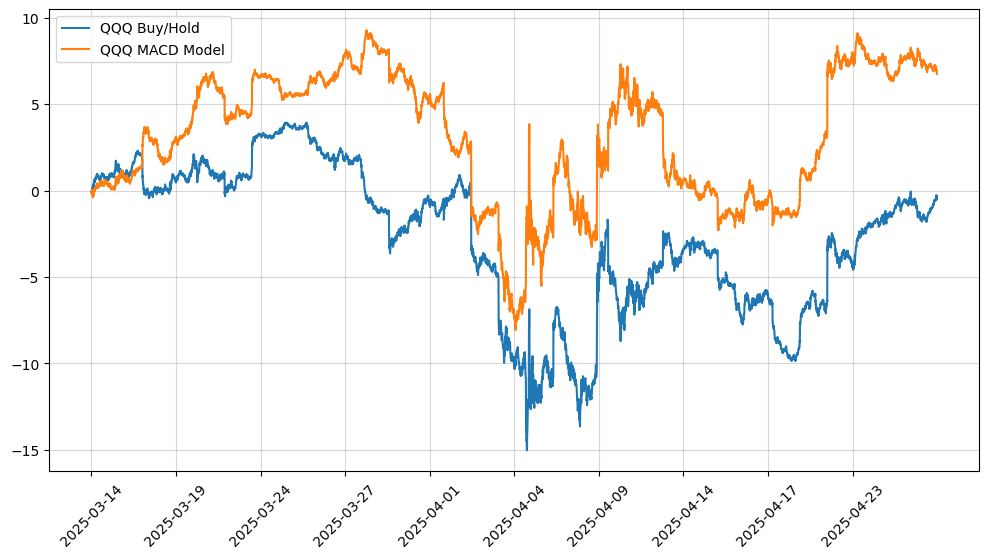

In [4]:
QQQ_macd.print_cumulative_return("QQQ")
QQQ_macd.gen_buyhold_comp("QQQ")

# Buy/Sell Signal Visualization (Proof)

from 2025-04-25-18:06 to 2025-04-28-19:58
count of buy signals: 113.0
count of sell signals: 112.5


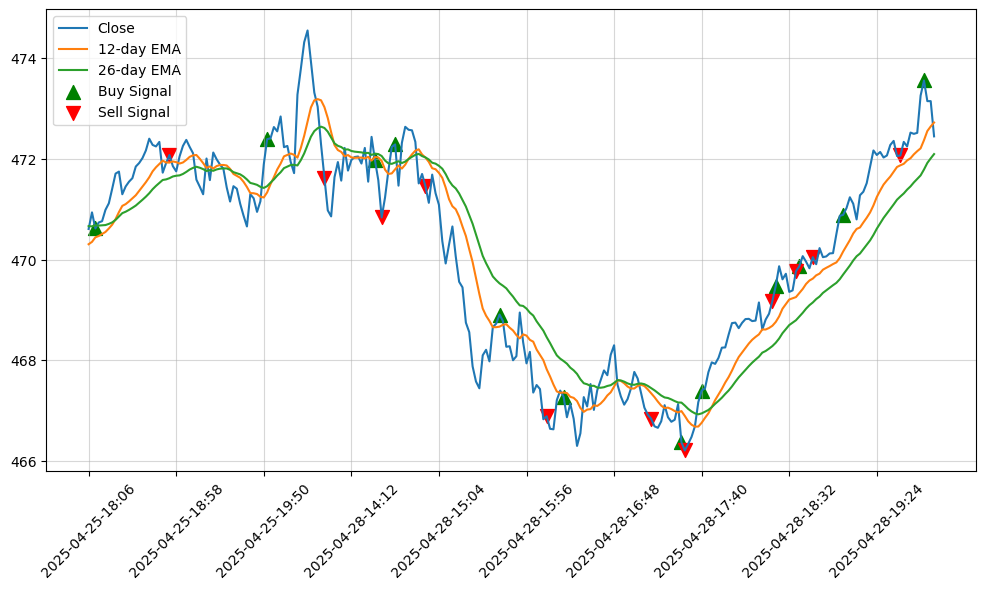

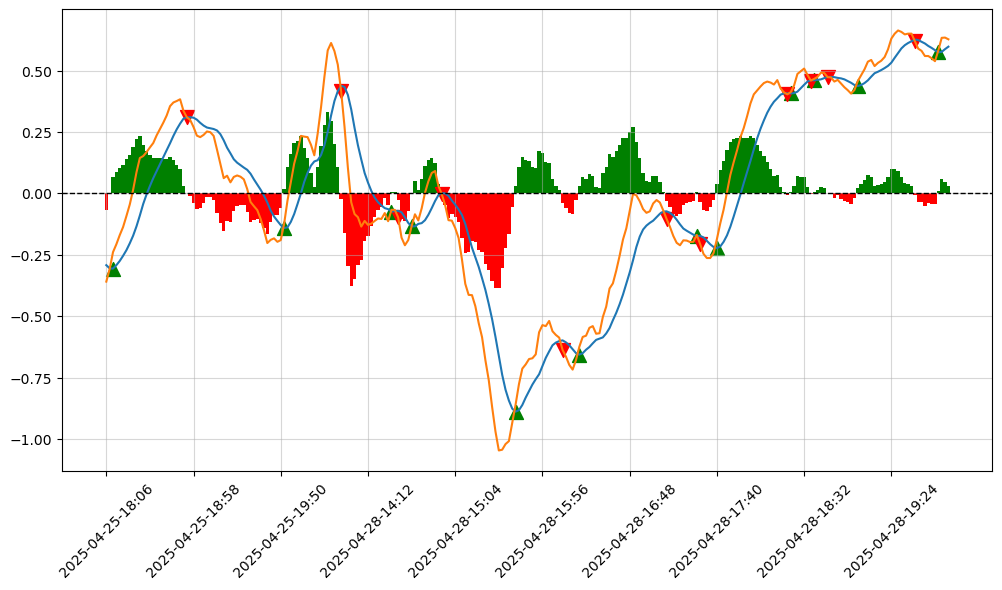

In [5]:
QQQ_macd.gen_macd_visual(model_days) 

# Sharpe Ratio:

In [6]:
print('QQQ Buy/Hold Sharpe Ratio:', round(gen_sharpe(QQQ_macd.gen_table()['Return']), 2))
print('QQQ MACD Model Sharpe Ratio:', round(gen_sharpe(QQQ_macd.gen_table()['MACD Model Return']), 2))

QQQ Buy/Hold Sharpe Ratio: -0.01
QQQ MACD Model Sharpe Ratio: 0.08
